*Вариант 10*

In [2]:
import random as rd
import pandas as pd
import math

Variant = 10
rd.seed(Variant)

set_operations = ['-','+','*','/']
set_operands = ['a', 'b', 'c']
count_operations = rd.randint(3,5)

expression = set_operands[rd.randint(0,len(set_operands)-1)]
for i in range(count_operations):
    current_operation = set_operations[rd.randint(0,len(set_operations)-1)]
    current_operand = set_operands[rd.randint(0,len(set_operands)-1)]
    expression = "(" + expression + current_operation + current_operand + ")"
expression

'(((((a/b)-a)/b)*c)+a)'

**Задание 1**

In [ ]:
format ELF64

public _start

section '.bss' writable
  buffer db 1

section '.text' executable
print_symbol:
    xor rbx, rbx

    cmp rax, 9
    jle .one_symbol

    mov rcx, 10
.loop:
    xor rdx, rdx
    div rcx
    push rdx
    inc rbx
    test rax, rax
    jnz .loop

.print:
    pop rax
    add rax, '0'
    mov [buffer], al

    mov eax, 1
    mov edi, 1
    mov rsi, buffer
    mov edx, 1
    syscall

    dec rbx
    jnz .print

    ret

.one_symbol:
    add rax, '0'
    mov [buffer], al

    mov eax, 1
    mov edi, 1
    mov rsi, buffer
    mov edx, 1
    syscall
    ret

_start:
    pop rcx
    cmp rcx, 2
    jl .exit

    mov rsi, [rsp + 8]
    movzx rax, byte [rsi]
    call print_symbol

.exit:
    mov eax, 60
    xor edi, edi
    syscall

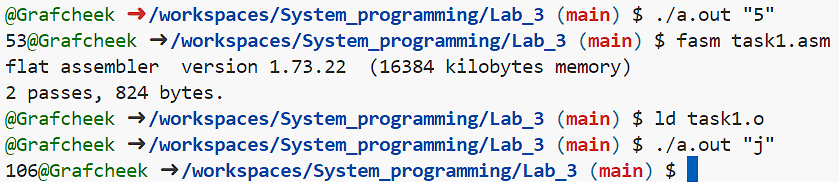

**Задание 2**

In [ ]:
format ELF64 
 
public _start 
 
section '.bss' writable 
    buffer db 1 
 
section '.text' executable 
 
string_to_number: 
    push rcx 
    push rbx 
 
    xor rax, rax 
    xor rcx, rcx 
 
.loop: 
    xor rbx, rbx 
    mov bl, byte [rsi + rcx] 
    cmp bl, 48 
    jl .is_finished_check 
    cmp bl, 57 
    jg .is_finished_check 
 
    sub bl, 48 
    add rax, rbx 
    mov rbx, 10 
    mul rbx 
    inc rcx 
    jmp .loop 
 
.is_finished_check: 
    cmp rcx, 0 
    je .reset 
    mov rbx, 10 
    div rbx 
 
.reset: 
    pop rbx 
    pop rcx 
    ret 
 
print_symbol: 
    xor rbx, rbx 
 
    cmp r12, 1 
    jne .pos 
 
    push rax 
    mov rax, '-' 
    mov [buffer], al 
    mov rax, 1 
    mov rdi, 1 
    mov rsi, buffer 
    mov rdx, 1 
    syscall 
    pop rax 
     
    .pos: 
    cmp rax, 9 
    jle .one_symbol 
 
    mov rcx, 10 
.loop: 
    xor rdx, rdx 
    div rcx 
    push rdx 
    inc rbx 
    test rax, rax 
    jnz .loop 
 
.print_loop: 
    pop rax 
    add rax, '0' 
    mov [buffer], al 
 
    mov eax, 1 
    mov edi, 1 
    mov rsi, buffer 
    mov edx, 1 
    syscall 
 
    dec rbx 
    jnz .print_loop 
 
    ret 
 
.one_symbol: 
    add rax, '0' 
    mov [buffer], al 
 
    mov eax, 1 
    mov edi, 1 
    mov rsi, buffer 
    mov edx, 1 
    syscall 
    ret 
 
_start: 
    pop rcx 
    cmp rcx, 4 
    jne .exit 
 
    mov rsi, [rsp + 8] 
    call string_to_number 
    mov r8, rax 
 
    mov rsi, [rsp + 16] 
    call string_to_number 
    mov r9, rax 
 
    mov rsi, [rsp + 24] 
    call string_to_number 
    mov r10, rax 
 
    mov rax, r8 
    xor rdx, rdx 
    idiv r9 
    mov r11, rax 
 
   
    mov rax, r11 
    sub rax, r8 
    mov r11, rax 
 
    cmp r11,0 
    jge .cont_1 
    neg r11 
    mov r12, 1 
 
    .cont_1: 
    mov rax, r11 
    xor rdx, rdx 
    idiv r9 
    mov r11, rax 
   
    imul r11, r10 
 
    cmp r12, 1 
    jne .pos 
 
    sub r8, r11 
    mov r11, r8 
    jmp .print 
    .pos: 
    add r11, r8 
    .print: 
    xor r12, r12 
    mov rax, r11 
 
    cmp rax,0 
    jge .cont_2 
    neg rax 
    mov r12, 1 
 
    .cont_2: 
 
    call print_symbol 
 
.exit: 
    mov eax, 60 
    xor edi, edi 
    syscall

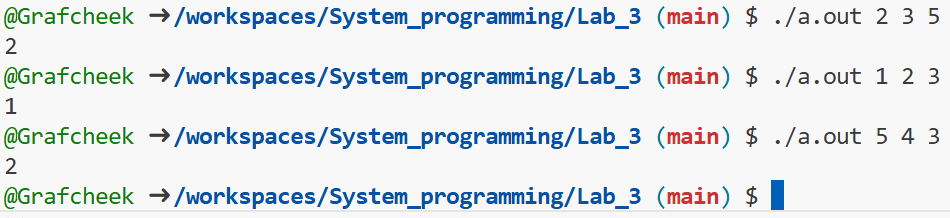

**Задание 3**

In [ ]:
#include <stdio.h>
#include <stdlib.h>

int main(int argc, char *argv[]) {
    if (argc == 4) {
        int a = atoi(argv[1]);
        int b = atoi(argv[2]);
        int c = atoi(argv[3]);
        
        if (b == 0) {
            printf("Invalid input: division by zero\n");
            return 1;
        }

        int result = (((((a / b) - a) / b) * c) + a);
        printf("%d\n", result);
    } else {
        printf("Invalid input: please provide three integers\n");
    }
    return 0;
}

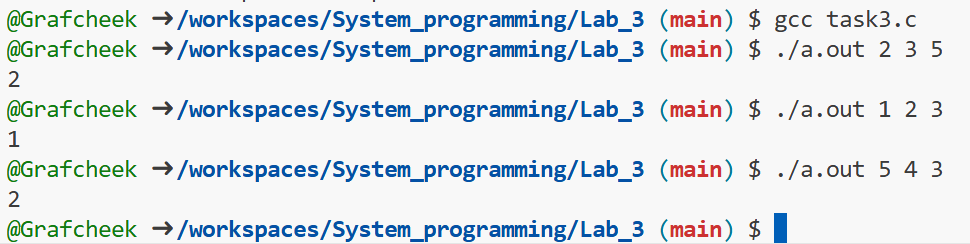